# Phugoid Full Model

Dynamic model, with lift, weight, drag, and $\theta$, the positive angle of the trajectory

### System of Equations:

$$ \begin{align}
v' & = -g\, \sin \theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\
\theta' & = - \frac{g}{v}\, \cos \theta + \frac{g}{v_t^2}\, v
\end{align} $$

### The Initial Value Problem

Position of the glider on a vertical plane with respect to an inertial frame of reference:

$$ \begin{align}
x' (t) & = v\, \cos \theta \\
y' (t) & = v\, \sin \theta
\end{align} $$

Initial values for every unknown:

$$ \begin{align}
v (0) = v_0 \quad \text {and} \quad \theta (0) = \theta_0 \\
x (0) = x_0 \quad \text {and} \quad y (0) = y_0 \\
\end{align} $$

### Euler's Method

The full system of equations discretized with Euler's method is:

$$ \begin{align}
v^{n+1} & = v^n + \Delta t \left(- g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2 \right) \\
\theta^{n+1} & = \theta^n + \Delta t \left(- \frac{g}{v^n}\,\cos\theta^n + \frac{g}{v_t^2}\, v^n \right) \\
x^{n+1} & = x^n + \Delta t \, v^n \cos\theta^n \\
y^{n+1} & = y^n + \Delta t \, v^n \sin\theta^n.
\end{align} $$

As a vector equation:
$$
u'(t) = f(u)
$$

where

$$ \begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix}
\end{align} $$

### Solve

In [1]:
import math
import numpy as np
from matplotlib import pyplot as py
% matplotlib inline

In [2]:
# font family and size for Matplotlib figures
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [3]:
# Parameters
g = 9.81   # gravitational acceleration, m/s^2
vt = 30.0   # trim velocity, m/s
CD = 1.0/40   # drag coefficient
CL = 1.0   # lift coefficient

# Initial conditions
v0 = vt   # start at the trim velocity
theta0 = 0.0   # trajectory angle
x0 = 0.0   # horizontal position
y0 = 1000.0   # vertical position, altitude

In [4]:
"""
    Function to return the right-hand size of
        the phugoid system of equations.
    ------------------------------------------
    u : list or numpy.ndarray, solution at the previous
        time step as a list or a 1D array of floats
    CL : float, lift coefficient
    CD : float, drag coefficient
    g : float, gravitational acceleration
    vt : float, trim velocity
"""
def rhs_phugoid(u, CL, CD, g, vt):
    v, theta, x, y = u
    rhs = np.array([ -g * math.sin(theta) - CD/CL * g/vt**2 * v**2,
                    -g * math.cos(theta) / v + g/vt**2*v,
                    v * math.cos(theta),
                    v * math.sin(theta)])
    return rhs

In [5]:
"""
    Function to return the solution at the next 
        time step using Euler's method.
    ------------------------------------------
    u : numpy.ndarray, solution at the previous
        time step as a 1D array of floats
    f : function, computes the right-hand side of the system
    dt : float, time-step size
    args : tuple, optional, positional arguments to pass to
            the function f
"""
def euler(u, f, dt, *args):
    u_new = u + dt * f(u, *args)
    return u_new

In [6]:
T = 100.0   # length of time interval
dt = 0.1   # time-step size
N = int(T/dt) + 1   # number of time-steps

# array to store the solution at each time step
u = np.empty((N,4))

#initial condition
u[0] = np.array([v0, theta0, x0, y0])

# time integration with Euler's method
for n in range(N-1):
    u[n+1] = euler(u[n], rhs_phugoid, dt, CL, CD, g, vt)

### Plot

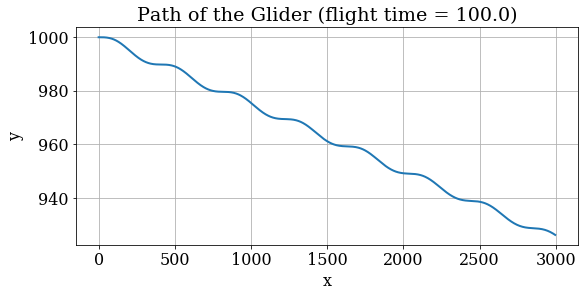

In [7]:
# Glider's position over the time
x = u[:, 2]
y = u[:, 3]

# plot of glider's path
py.figure(figsize = (9.0, 4.0))
py.title('Path of the Glider (flight time = {})'.format(T))
py.xlabel('x')
py.ylabel('y')
py.grid()
py.plot(x, y, color = 'C0', linestyle = '-', linewidth = 2);

### Grid Convergence

In [8]:
# list of time-step sizes
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# empty list to store the solution of each grid
u_values = []

for dt in dt_values:
    # number of time-steps
    N = int(T/dt) + 1
    
    # array to store the solution at each time step
    u = np.empty((N,4))
    
    # initial condition
    u[0] = np.array([v0, theta0, x0, y0])
    
    # temporal integration using Euler's method
    for n in range(N-1):
        u[n+1] = euler(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    
    # stores the solution for the present time-step size
    u_values.append(u)

In [9]:
"""
    Function to return the difference in the L1-norm between
        the solution on a coarse grid, and on a fine grid.
    ------------------------------------------
    u_coarse : numpy.ndarray, solution on the coarse grid
        as an array of floats
    u_fine : numpy.ndarray, solution on the fine grid
        as an array of floats
    dt : float, time-step size
"""
def l1_diff(u_coarse, u_fine, dt):
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine/N_coarse)
    diff = dt * np.sum(np.abs(u_coarse - u_fine[::ratio]))
    return diff

In [10]:
# empty list to store the difference in the solution
# between two grids
diff_values = []

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:,2], u_values[-1][:,2], dt)
    diff_values.append(diff)

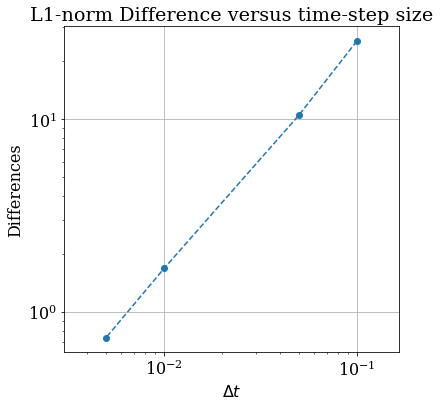

In [11]:
# Difference versus the time-step sie
py.figure(figsize = (6.0,6.0))
py.title('L1-norm Difference versus time-step size')
py.xlabel('$\Delta t$')
py.ylabel('Differences')
py.grid()
py.loglog(dt_values[:-1], diff_values, color = 'C0', linestyle = '--' ,marker = 'o')
py.axis('equal');

### Order of Convergence

Using 3 grid resolutions, refined at a constant ratio $r$ to find the *observed order of convergence* ($p$):

$$ \begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation} $$

* where $f_1$ is the finest mesh solution, and $f_3$ the coarsest

In [12]:
r = 2   # refinement ratio for the time-step size
h = 0.001   # base grid size

pdt_val = [h, r*h, r**2 * h]
pu_val = []

for dt in pdt_val:
    N = int(T/dt) + 1   # number of time steps
    
    # array to store the solution at each time step
    u = np.empty((N,4))
    
    # initial conditions
    u[0] = np.array([v0, theta0, x0, y0])
    
    # time integration using Euler's method
    for n in range(N-1):
        u[n+1] = euler(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    
    # solution
    pu_val.append(u)
    
f2f1 = l1_diff(pu_val[1][:,2], pu_val[0][:,2], pdt_val[1])   # f2 - f1
f3f2 = l1_diff(pu_val[2][:,2], pu_val[1][:,2], pdt_val[2])   # f3 - f2

# calculates the observed order of convergence
p = math.log(f3f2/f2f1) / math.log(r)
print('Observed Order of Convergence: p = {:.3f}'.format(p))

Observed Order of Convergence: p = 1.014
